In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
apple_width = np.random.normal(6, 0.5, 400)
apple_height = np.random.normal(6, 0.5, 400)

In [3]:
banana_width = np.random.normal(4, 0.5, 400)
banana_height = np.random.normal(8, 0.5, 400)

In [4]:
data = {
    'width': np.concatenate([apple_width, banana_width]),
    'height': np.concatenate([apple_height, banana_height]),
    'class': [1] * 400 + [0] * 400  # 1 for apples, 0 for bananas
}
fruits = pd.DataFrame(data)

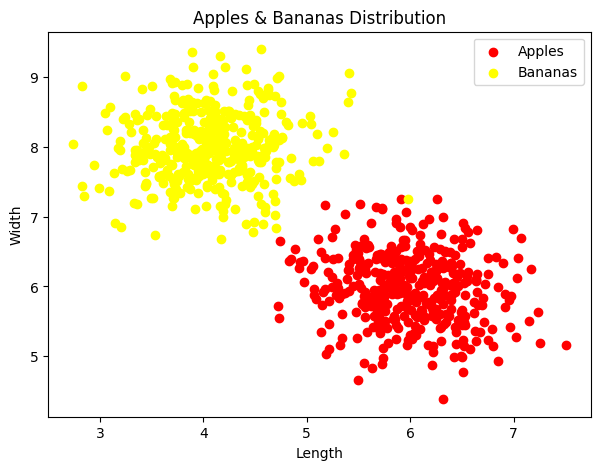

In [5]:
plt.figure(figsize=(7, 5))
plt.scatter(apple_width, apple_height, color = "red", label = "Apples")
plt.scatter(banana_width, banana_height, color = "yellow", label = "Bananas")
plt.title("Apples & Bananas Distribution")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [6]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [
    fruits.loc[fruits['class'] == 0, 'height'].mean(),
    fruits.loc[fruits['class'] == 1, 'height'].mean(),
    fruits.loc[fruits['class'] == 0, 'width'].mean(),
    fruits.loc[fruits['class'] == 1, 'width'].mean()
]
yerr = [
    2 * fruits.loc[fruits['class'] == 0, 'height'].std(),
    2 * fruits.loc[fruits['class'] == 1, 'height'].std(),
    2 * fruits.loc[fruits['class'] == 0, 'width'].std(),
    2 * fruits.loc[fruits['class'] == 1, 'width'].std()
]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

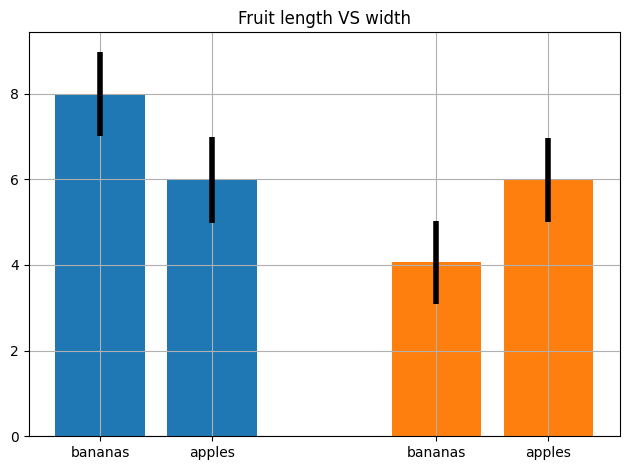

In [7]:
plt.bar(x=x, height=height, color=color, width=0.4, error_kw={'lw': 4}, yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')
plt.tight_layout()
plt.grid()
plt.show()

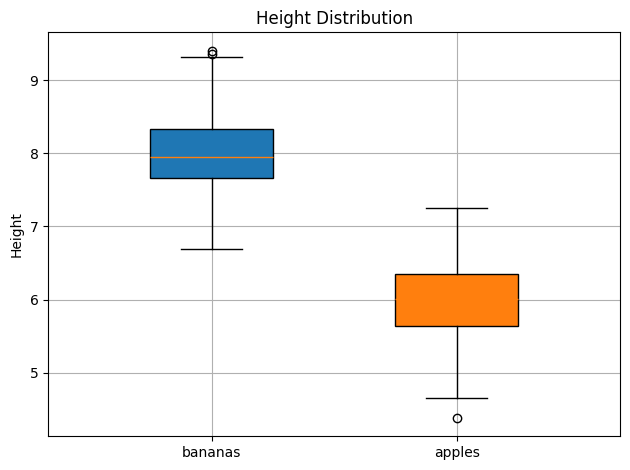

In [8]:
fea = 'height'
plt.boxplot(x=fruits.loc[fruits['class'] == 0, fea],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fruits.loc[fruits['class'] == 1, fea],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('Height')
plt.xlim(-0.2, 0.5)
plt.title('Height Distribution')
plt.tight_layout()
plt.grid()
plt.show()

Text(0.5, 0, 'Width')

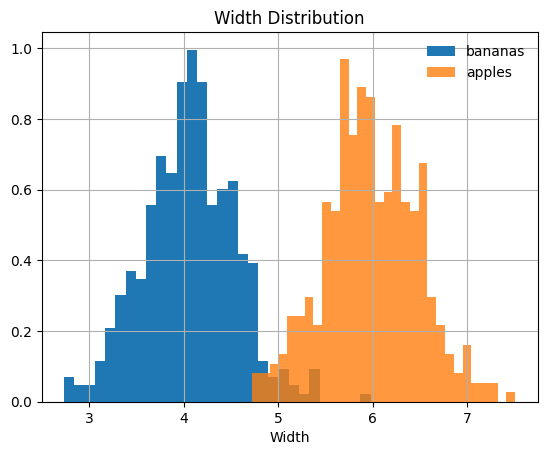

In [9]:
fea = 'width'
plt.hist(fruits.loc[fruits['class'] == 0, fea],
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(fruits.loc[fruits['class'] == 1, fea],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution')
plt.grid()
plt.xlabel('Width')

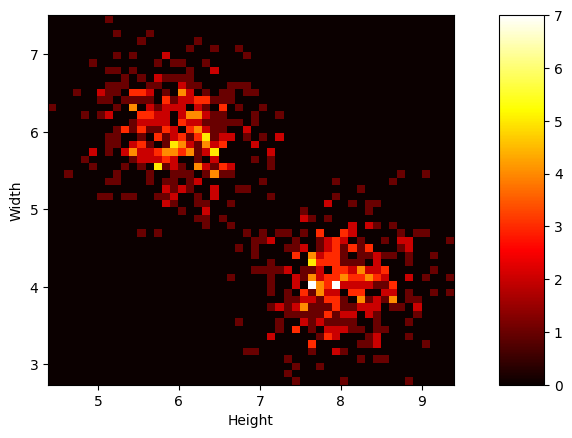

In [10]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x=fruits['height'], y=fruits['width'], bins=50, cmap=plt.cm.hot)
ax.set_xlabel('Height')
ax.set_ylabel('Width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)


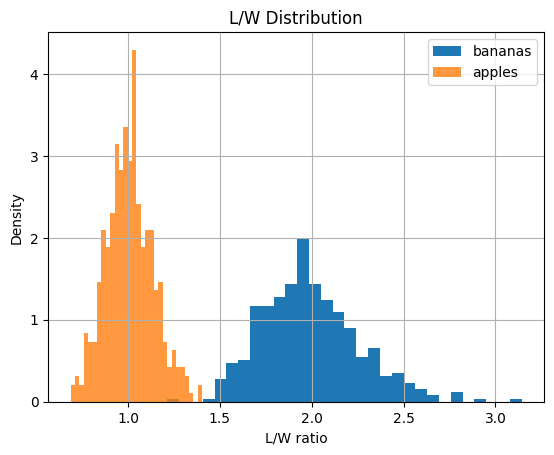

In [11]:
fea = 'L/W'
fruits[fea] = fruits['height'] / fruits['width']
plt.figure()
plt.hist(fruits.loc[fruits['class'] == 0, fea],
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(fruits.loc[fruits['class'] == 1, fea],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
plt.legend()
plt.title('L/W Distribution')
plt.xlabel('L/W ratio')
plt.ylabel('Density')
plt.grid()


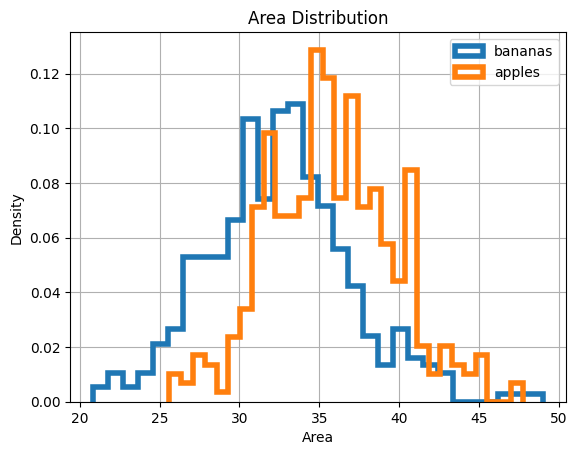

In [12]:
fea = 'area'
fruits[fea] = fruits['height'] * fruits['width'] 
plt.figure()
plt.hist(fruits.loc[fruits['class'] == 0, fea], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(fruits.loc[fruits['class'] == 1, fea], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Density')
plt.legend()
plt.grid()


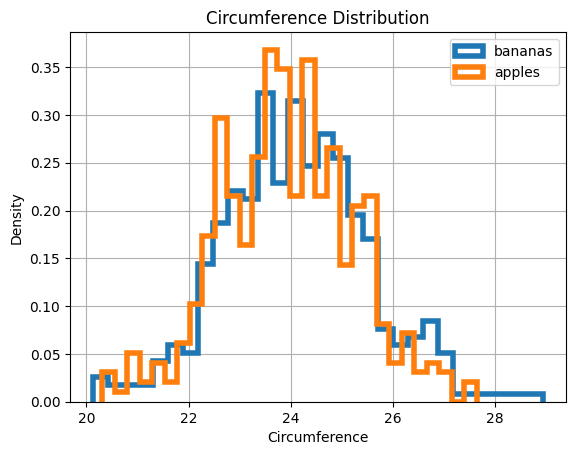

In [13]:
fea = 'circumference'
fruits[fea] = 2 * (fruits['height'] + fruits['width'])
plt.figure()
plt.hist(fruits.loc[fruits['class'] == 0, fea], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(fruits.loc[fruits['class'] == 1, fea], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Circumference Distribution')
plt.xlabel('Circumference')
plt.ylabel('Density')
plt.legend()
plt.grid()
